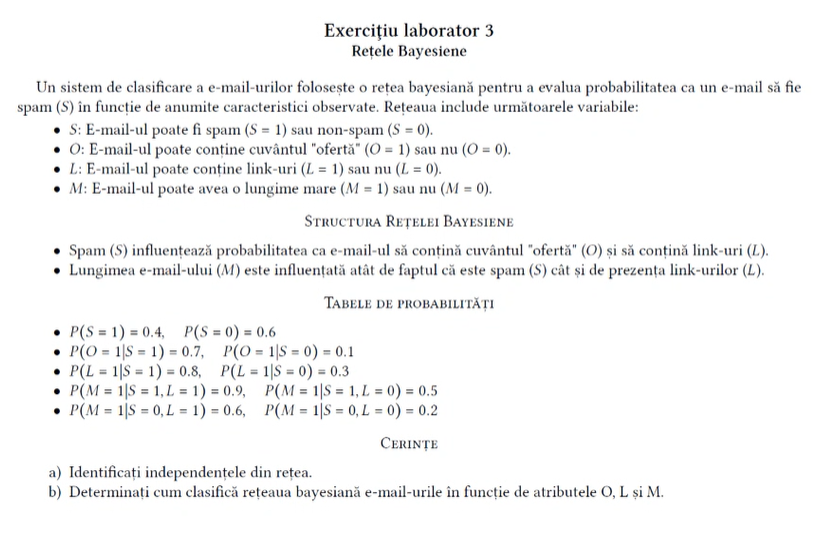

In [2]:
from IPython.display import Image
Image(filename="ex3.png")

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('S', 'O'), ('S', 'L'), ('S', 'M'), ('L', 'M')])

# P(S)
cpd_S = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])

# P(O|S)
cpd_O = TabularCPD(variable='O', variable_card=2,
                   values=[[0.9, 0.3],  # P(O=0|S)
                          [0.1, 0.7]],  # P(O=1|S)
                   evidence=['S'],
                   evidence_card=[2])

# P(L|S)
cpd_L = TabularCPD(variable='L', variable_card=2,
                   values=[[0.7, 0.2],  # P(L=0|S)
                          [0.3, 0.8]],  # P(L=1|S)
                   evidence=['S'],
                   evidence_card=[2])

# P(M|S,L)
cpd_M = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.4, 0.5, 0.1],  # P(M=0|S,L)
                          [0.2, 0.6, 0.5, 0.9]],  # P(M=1|S,L)
                   evidence=['S', 'L'],
                   evidence_card=[2, 2])

model.add_cpds(cpd_S, cpd_O, cpd_L, cpd_M)
print(model.check_model())

# Check independencies
print(model.local_independencies(['S','O','L','M']))

True
(O ⟂ M, L | S)
(L ⟂ O | S)
(M ⟂ O | S, L)
